# Hi- and Low- Temperature

Technical Challenge for Data Science Candidates

Using the ‘Hi Temperature’ values produce a “.txt” file containing all of the Dates and Times
where the “ Hi Temperature” was within +/- 1 degree of 22.3 or the “ Low Temperature ” was
within +/- 0.2 degree higher or lower of 10.3 over the first 9 days of June

## Implementation

This is a very clear task. 

I've used a pickle of the data file with a few extra columns.

I used some date arithmetic for the first 9 days.

I've used a wrapper object for the bounds that also holds the column name as tag.

And I've used numpy operators for performance.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
from cycler import cycler
import matplotlib.pyplot as plt

pd.__version__

'0.24.2'

In [3]:
# If you turn this feature on, you can display each result as it happens.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
df1 = pd.read_pickle("200606.pkl")

In [6]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4319 entries, 90 to 4408
Data columns (total 20 columns):
Date                      4319 non-null object
Time                      4319 non-null object
Temp Humidity Index       4319 non-null float64
Outside Temperature       4319 non-null float64
WindChill                 4319 non-null float64
Hi Temperature            4319 non-null float64
Low Temperature           4319 non-null float64
Outside Humidity          4319 non-null int64
DewPoint                  4319 non-null float64
WindSpeed                 4319 non-null int64
Hi                        4319 non-null int64
Wind Direction            4319 non-null object
Rain                      4319 non-null float64
Barometer                 4319 non-null float64
Inside  Temperature       4319 non-null float64
Inside  Humidity          4319 non-null int64
ArchivePeriod             4319 non-null int64
dttm0                     4319 non-null datetime64[ns]
m0                        4319 non

,Date,Time,Temp Humidity Index,Outside Temperature,WindChill,Hi Temperature,Low Temperature,Outside Humidity,DewPoint,WindSpeed,Hi,Wind Direction,Rain,Barometer,Inside Temperature,Inside Humidity,ArchivePeriod,dttm0,m0,dy0
90,01/06/2006,00:00,9.6,9.6,9.6,9.6,9.5,81,6.4,1,10,WNW,0.0,1014.4,21.1,40,10,2006-06-01 00:00:00,6,1
91,01/06/2006,00:10,9.5,9.5,9.5,9.6,9.5,81,6.4,1,5,SW,0.0,1014.4,21.1,40,10,2006-06-01 00:10:00,6,1
92,01/06/2006,00:20,9.5,9.5,9.5,9.6,9.5,81,6.4,1,7,WSW,0.0,1014.3,21.1,40,10,2006-06-01 00:20:00,6,1
93,01/06/2006,00:30,9.5,9.5,9.5,9.6,9.5,82,6.6,1,6,W,0.0,1014.2,21.1,40,10,2006-06-01 00:30:00,6,1
94,01/06/2006,00:40,9.5,9.5,9.5,9.6,9.5,83,6.8,1,6,SW,0.0,1014.1,21.0,40,10,2006-06-01 00:40:00,6,1


In [7]:
## Filter down to first 9 days
ndays=9
cut0 = df1.dttm0.min().normalize() + pd.DateOffset(days=ndays)
df2 = df1[ df1['dttm0'] < cut0]

In [8]:
df2.columns

Index(['Date', 'Time', 'Temp Humidity Index   ', 'Outside Temperature',
       'WindChill', 'Hi Temperature', 'Low Temperature', 'Outside Humidity',
       'DewPoint', 'WindSpeed', 'Hi', 'Wind Direction', 'Rain', 'Barometer',
       'Inside  Temperature', 'Inside  Humidity', 'ArchivePeriod', 'dttm0',
       'm0', 'dy0'],
      dtype='object')

In [9]:
## A bag to make invoking the functions easier.
class Range0:
    def __init__(self, b0, n0, tag):
        self.b = b0
        self.l = b0 - n0
        self.u = b0 + n0
        self.tag = tag
        
    def __str__(self):
        return "{} {} {} {}".format(self.b, self.l, self.u, self.tag)

In [10]:
## Set-up the bags
u0 = Range0(22.3, 1, 'Hi Temperature')
print(u0)
l0 = Range0(10.3, 0.2, 'Low Temperature')
print(l0)
# There is a rounding error here.

22.3 21.3 23.3 Hi Temperature
10.3 10.100000000000001 10.5 Low Temperature


In [11]:
## using numpy is faster
def extract0(df, r0):
    x0 = df[r0.tag].values
    return np.logical_and(x0 < r0.u, x0 > r0.l)

In [12]:
# So this is relatively fast and simple to invoke
df3 = df2.iloc[np.where(np.logical_or(extract0(df2, u0), extract0(df2, l0)))]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b6e628f28>,
      dtype=object)

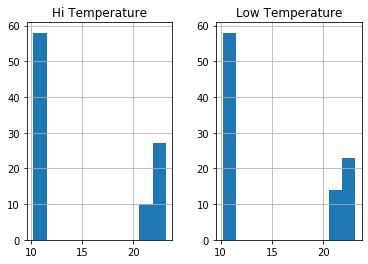

In [13]:
df3[[u0.tag, l0.tag]].hist()

In [14]:
df3.tail()

,Date,Time,Temp Humidity Index,Outside Temperature,WindChill,Hi Temperature,Low Temperature,Outside Humidity,DewPoint,WindSpeed,Hi,Wind Direction,Rain,Barometer,Inside Temperature,Inside Humidity,ArchivePeriod,dttm0,m0,dy0
1381,09/06/2006,23:10,10.4,10.4,10.4,10.4,10.4,89,8.7,4,9,ENE,0.0,1011.4,22.7,45,10,2006-06-09 23:10:00,6,9
1382,09/06/2006,23:20,10.3,10.3,10.3,10.4,10.3,90,8.8,4,8,ENE,0.0,1011.5,22.6,44,10,2006-06-09 23:20:00,6,9
1383,09/06/2006,23:30,10.3,10.3,10.3,10.3,10.3,90,8.7,4,10,NE,0.0,1011.5,22.5,45,10,2006-06-09 23:30:00,6,9
1384,09/06/2006,23:40,10.2,10.2,10.2,10.3,10.2,90,8.7,3,9,NE,0.0,1011.4,22.5,45,10,2006-06-09 23:40:00,6,9
1385,09/06/2006,23:50,10.2,10.2,10.2,10.2,10.2,90,8.7,3,11,NE,0.0,1011.4,22.5,45,10,2006-06-09 23:50:00,6,9
